## some notes on github:
I created a new branch called 'Noa' by:
    git checkout -b "Noa"

When working, type: 'git status'/'git branch' to make sure I'm on branch Noa. If not, 'git checkout Noa' will switch me to the correct branch.

'git push origin Noa' to push changes.

##  Outline
This script is ran after the 'EFRCourier_parser' which create a .csv file for each subject.
If needed, you can create this csv. by running parse_data.py in terminal.

first, cd to /scratch/new_courier_pilot (or to the location where the data is saved).
If running this in bash shell run: 'python parse_data.py'. You may need to specify the specific folder you want, as is: python parse_data.py Noa.
You should be able to find a new csv. file creasted for each directory. If that doesn't work, make sure that the directory structure is similar to the other ones.

In [66]:
# change directory location if needed:    
data_dir = "/scratch/new_courier_pilot/" ## pilot data directory
# data_dir = "/scratch/EFRCourier_reports/" ## hospital data directory

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_to_pybeh as pb
from pandas_to_pybeh import *
import seaborn as sns
import os,sys,argparse,glob

import json
from  matplotlib.ticker import FuncFormatter

pd.set_option('display.max_columns', 1000)
import warnings
warnings.filterwarnings("ignore")

In [68]:
# create a df with a specific subject and session
def read_sub_sess_data(data_dir, sub, sess):
    
    file_name = "{}_sess_{}.csv".format(sub, sess)    
    df = pd.read_csv(os.path.join(data_dir, file_name))
    df = df.drop(columns=['Unnamed: 0'])
    
    return df

# create a df with all sessions for a specific subject 
def read_sub_data(data_dir, sub):
    df = None
    
    os.chdir(data_dir)
    for file in glob.glob("*.csv"):
        if sub in file:
            tmp = pd.read_csv(file)
            tmp = tmp.drop(columns=['Unnamed: 0'])
            df = tmp if df is None else df.append(tmp)
    
    return df

choose a subject:

In [69]:
# # example:
# PILOT1_evs = read_sub_sess_data(data_dir, "Matt", 0)
# PILOT1_evs

# # if using real (hospital) subjects' data:
# PILOT1_evs = read_sub_sess_data(data_dir, "R1620J", 0)
# PILOT1_evs

or create a df with all subjects saved in the directory

In [70]:
# or create a df with all subjects saved in the directory
full_evs = None

os.chdir(data_dir)
for file in glob.glob("*.csv"):
    df = pd.read_csv(file)
    df = df.drop(columns=['Unnamed: 0'])
    full_evs = df if full_evs is None else full_evs.append(df)

full_evs

,type,mstime,trial,item,cued_item,serialpos,cued_store,store,store position,player position,positionX,positionZ,correct direction (degrees),pointed direction (degrees),key code,subject,session,recalled,intrusion,itemno,final_recalled,storeX,storeZ,presX,presZ,keypress,keypress_keycode,keypress_mstime,exp_type
0,versions,1.656014e+12,-999,NaN,NaN,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arnav,0,-999,-999,-999,NaN,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN,ReadOnly
1,experimentConfig,1.656014e+12,-999,NaN,NaN,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arnav,0,-999,-999,-999,NaN,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN,ReadOnly
2,systemConfig,1.656014e+12,-999,NaN,NaN,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arnav,0,-999,-999,-999,NaN,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN,ReadOnly
3,store mappings,1.656014e+12,-999,NaN,NaN,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arnav,0,-999,-999,-999,NaN,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN,ReadOnly
4,press any key prompt,1.656014e+12,-999,NaN,NaN,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Arnav,0,-999,-999,-999,NaN,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN,ReadOnly
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5615,PlayerTransform,1.652985e+12,-999,NaN,NaN,-999,NaN,NaN,NaN,NaN,45.99706,33.88992,NaN,NaN,NaN,PILOT6,1,-999,-999,-999,NaN,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN,ReadOnly
5616,key press/release,1.652985e+12,-999,NaN,NaN,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310.0,PILOT6,1,-999,-999,-999,NaN,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN,ReadOnly
5617,key press/release,1.652985e+12,-999,NaN,NaN,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310.0,PILOT6,1,-999,-999,-999,NaN,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN,ReadOnly
5618,key press/release,1.652985e+12,-999,NaN,NaN,-999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,310.0,PILOT6,1,-999,-999,-999,NaN,-999.0,-999.0,-999.0,-999.0,NaN,NaN,NaN,ReadOnly


Check df of event creation

In [71]:
import json
import pandas as pd
event_file = json.load(open('/home1/noaherz/EFRCourier_Analysis/event_creation/task_events.json', "r"))
events = pd.DataFrame(event_file)
events['subject'].unique()
full_evs = events

In [72]:
full_evs['subject'].unique()

array(['R1620J'], dtype=object)

Check who's data you are analyzing:

In [73]:
word_evs = full_evs.query('type == "WORD"')
deliv_table = word_evs.groupby(["subject", "session"]).agg({"trial":pd.Series.nunique}).reset_index()
deliv_table

,subject,session,trial
0,R1620J,-999,2


# Navigation Logistics

Histogram of navigation time between each two stores

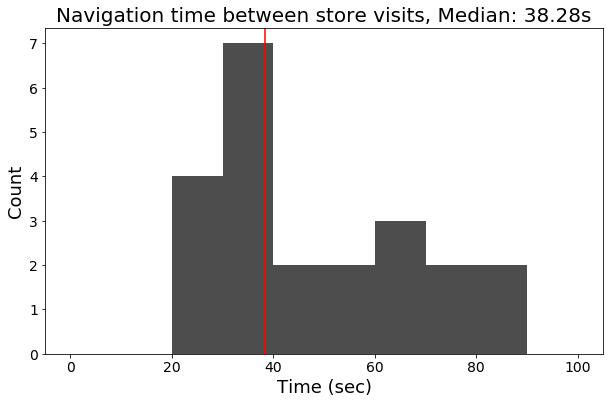

In [74]:
word_evs = full_evs.query('type == "WORD"')
total_delivery_time = []

for trial, trial_evs in word_evs.groupby("trial"):
    delivery_times = np.diff(trial_evs.mstime) / 1000
    total_delivery_time.extend(delivery_times)

median = np.median(total_delivery_time)
median = float("{0:.2f}".format(median))
fig, ax = plt.subplots(figsize=(10,6))
plt.hist(total_delivery_time, color=(0.3,0.3,0.3), range=(0, 100))
plt.axvline(np.median(total_delivery_time), color="r")
plt.title("Navigation time between store visits, Median: {}s".format(median), fontsize=20)
plt.xlabel("Time (sec)", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# make ticks larger
plt.show()

# Pointing task 
Here I'm plotting the polar graph for the pointing task using Deepti's code

In [81]:
def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : `.BarContainer` or list of a single `.Polygon`
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)

    # Compute width of each bin
    widths = np.pi/18

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                     edgecolor='C0', fill=True, linewidth=1)

    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    return n, bins, patches

In [91]:
evs.type.unique()

array(['START', 'store mappings', 'SR_REC_WORD_VV', 'SR_REC_WORD',
       'FFR_REC_WORD_VV', 'FFR_REC_WORD', 'TRIAL_START',
       'pointing begins', 'pointing finished', 'STIM', 'WORD',
       'TRIAL_END', 'REC_START', 'REC_WORD', 'REC_WORD_VV', 'REC_STOP',
       'CUED_REC_CUE', 'CUED_REC_WORD', 'CUED_REC_STOP',
       'CUED_REC_WORD_VV', 'FSR_START', 'FSR_STOP', 'FFR_START',
       'FFR_STOP', 'SESS_END'], dtype=object)

In [92]:
pointing_evs = full_evs[full_evs.type == 'pointing finished']
# filt_point_evs = pointing_evs[(pointing_evs['presX']) != -999.00]
# print(len(pointing_evs))
# print(len(filt_point_evs))
#find the raw pointing error for each pointing task completed
submitted_point = pointing_evs['submittedPointingDirection'] 
correct_point = filt_point_evs['correctPointingDirection']
difference = np.radians(submitted_point - correct_point)
difference = (difference + np.pi) % (2 * np.pi) - np.pi
difference = np.array(difference)

#find the store locations for all stores visited 
# store_evs = full_evs[~pd.isnull(full_evs['store position'])]
store_evs = full_evs[~pd.isnull(full_evs['store'])]
stores = store_evs.groupby('store')  
stores = stores.agg('mean')[['storeX', 'storeZ']]
storeX = stores['storeX'].values
storeZ = stores['storeZ'].values

pos_angles = []
correct_point = np.array(correct_point)
x = 0
for i, finished_row in filt_point_evs.iterrows():
    position_x, position_z = finished_row[['presX', 'presZ']]
    difference_x = (storeX - position_x)
    difference_z = (storeZ - position_z)
    angle = np.arctan2(difference_z, difference_x) 
    angle = (angle + np.pi) % (2 * np.pi) - np.pi
    angle = np.abs(angle)
    pos_angles.append(np.median(angle - correct_point[x]))
    x = x + 1

# apply correction of pointing error and wrap again to display nicely
pos_angles = np.array(pos_angles)
pos_angles = np.radians(pos_angles)
point_error = difference/ pos_angles
point_error = (point_error + np.pi) % (2 * np.pi) - np.pi


ValueError: operands could not be broadcast together with shapes (43,) (0,) 

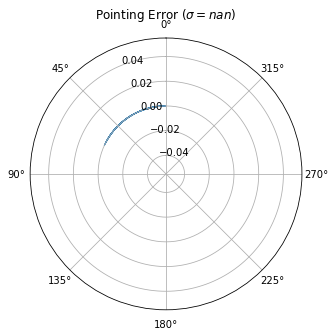

In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection = 'polar')

n, bins, _ = circular_hist(ax, point_error, offset = np.pi/2, bins = 30, density = False)
plt.title('Pointing Error ($\sigma = {:.2f}$)'.format(point_error.std()*180/np.pi))
ax.vlines([np.mean(point_error)+point_error.std(), np.mean(point_error)-point_error.std()], ymin = 0, 
          ymax = np.max(point_error.size/np.pi)*0.35, ls = "--", colors = 'k')
ax.vlines(np.mean(point_error), ymin = 0, ymax=np.max(point_error.size/np.pi)*0.35,ls = '--', colors = 'r')
plt.show()


In [75]:
def circular_hist(ax, x, bins=16, density=True, offset=0, gaps=True):
    """
    Produce a circular histogram of angles on ax.

    Parameters
    ----------
    ax : matplotlib.axes._subplots.PolarAxesSubplot
        axis instance created with subplot_kw=dict(projection='polar').

    x : array
        Angles to plot, expected in units of radians.

    bins : int, optional
        Defines the number of equal-width bins in the range. The default is 16.

    density : bool, optional
        If True plot frequency proportional to area. If False plot frequency
        proportional to radius. The default is True.

    offset : float, optional
        Sets the offset for the location of the 0 direction in units of
        radians. The default is 0.

    gaps : bool, optional
        Whether to allow gaps between bins. When gaps = False the bins are
        forced to partition the entire [-pi, pi] range. The default is True.

    Returns
    -------
    n : array or list of arrays
        The number of values in each bin.

    bins : array
        The edges of the bins.

    patches : `.BarContainer` or list of a single `.Polygon`
        Container of individual artists used to create the histogram
        or list of such containers if there are multiple input datasets.
    """
    # Wrap angles to [-pi, pi)
    x = (x+np.pi) % (2*np.pi) - np.pi

    # Force bins to partition entire circle
    if not gaps:
        bins = np.linspace(-np.pi, np.pi, num=bins+1)

    # Bin data and record counts
    n, bins = np.histogram(x, bins=bins)

    # Compute width of each bin
    widths = np.pi/18

    # By default plot frequency proportional to area
    if density:
        # Area to assign each bin
        area = n / x.size
        # Calculate corresponding bin radius
        radius = (area/np.pi) ** .5
    # Otherwise plot frequency proportional to radius
    else:
        radius = n

    # Plot data on ax
    patches = ax.bar(bins[:-1], radius, zorder=1, align='edge', width=widths,
                     edgecolor='C0', fill=True, linewidth=1)

    # Set the direction of the zero angle
    ax.set_theta_offset(offset)

    # Remove ylabels for area plots (they are mostly obstructive)
    if density:
        ax.set_yticks([])

    return n, bins, patches

In [76]:
pointing_evs = full_evs[full_evs.type == 'pointing finished']
pointing_evs

,correctPointingDirection,eegfile,eegoffset,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,montage,msoffset,mstime,phase,presX,presZ,protocol,recalled,rectime,serialpos,session,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
4,213.625000,R1620J_EFRCourierReadOnly_0_03Jun22_1550,517750,-999,EFRCourierReadOnly,-999,-999,-999,-999,-999,0.0,-1,1654297139446,,-999.0,-999.0,r1,-999,-999.0,-999,-999,-999,-999.000000,-999.000000,R1620J,278.500000,-999,pointing finished
7,321.250000,R1620J_EFRCourierReadOnly_0_03Jun22_1550,658799,-999,EFRCourierReadOnly,-999,-999,-999,-999,-999,0.0,-1,1654297280495,,-999.0,-999.0,r1,-999,-999.0,-999,-999,-999,-999.000000,-999.000000,R1620J,174.000000,-999,pointing finished
9,99.187500,R1620J_EFRCourierReadOnly_0_03Jun22_1550,679600,-999,EFRCourierReadOnly,-999,-999,-999,-999,-999,0.0,-1,1654297301296,,-999.0,-999.0,r1,-999,-999.0,-999,-999,-999,-999.000000,-999.000000,R1620J,1.000000,-999,pointing finished
11,157.625000,R1620J_EFRCourierReadOnly_0_03Jun22_1550,740214,-999,EFRCourierReadOnly,-999,-999,-999,-999,-999,0.0,-1,1654297361910,,-999.0,-999.0,r1,-999,-999.0,-999,-999,-999,-999.000000,-999.000000,R1620J,140.250000,-999,pointing finished
14,346.000000,R1620J_EFRCourierReadOnly_0_03Jun22_1550,833340,-999,EFRCourierReadOnly,-999,-999,-999,-999,-999,0.0,-1,1654297455036,,-999.0,-999.0,r1,-999,-999.0,-999,-999,-999,-999.000000,-999.000000,R1620J,343.250000,-999,pointing finished
16,202.000000,R1620J_EFRCourierReadOnly_0_03Jun22_1550,867524,-999,EFRCourierReadOnly,-999,-999,-999,-999,-999,0.0,-1,1654297489220,,-999.0,-999.0,r1,-999,-999.0,-999,-999,-999,-999.000000,-999.000000,R1620J,102.125000,-999,pointing finished
19,1.061523,R1620J_EFRCourierReadOnly_0_03Jun22_1550,963420,-999,EFRCourierReadOnly,-999,-999,-999,-999,-999,0.0,-1,1654297585116,,-999.0,-999.0,r1,-999,-999.0,-999,-999,-999,-999.000000,-999.000000,R1620J,83.625000,-999,pointing finished
22,167.625000,R1620J_EFRCourierReadOnly_0_03Jun22_1550,1046346,-999,EFRCourierReadOnly,-999,-999,-999,-999,-999,0.0,-1,1654297668042,,-999.0,-999.0,r1,-999,-999.0,-999,-999,-999,-999.000000,-999.000000,R1620J,66.000000,-999,pointing finished
26,104.375000,R1620J_EFRCourierReadOnly_0_03Jun22_1550,1259620,-999,EFRCourierReadOnly,-999,-999,-999,-999,-999,0.0,-1,1654297881316,,-999.0,-999.0,r1,-999,-999.0,-999,-999,-999,-999.000000,-999.000000,R1620J,272.250000,-999,pointing finished
29,31.000000,R1620J_EFRCourierReadOnly_0_03Jun22_1550,1320186,-999,EFRCourierReadOnly,-999,-999,-999,-999,-999,0.0,-1,1654297941882,,-999.0,-999.0,r1,-999,-999.0,-999,-999,-999,32.187500,-60.906250,R1620J,261.000000,-999,pointing finished


Add columns 'storeX' and 'storeZ' that represents the location of stores in town

In [77]:
# # these columns are absent in the new task, so I am creating them from the store position column
# pointing_tasks = full_evs[full_evs.type == 'pointing finished']
# pointing_tasks['store position']
# storeX = []; storeZ = []
# for trial in range(0,len(pointing_tasks['store position'])):
#     position=pointing_tasks['store position'].iloc[trial]
#     try:
#         new_tuple=eval(position)
#         storeX.append(new_tuple[0])
#         storeZ.append(new_tuple[2])
#     except:
#         storeX.append(-999)
#         storeZ.append(-999)

# # Add new columns to df:
# pointing_tasks['storeX'] = storeX
# pointing_tasks['storeZ'] = storeZ



For this part we need to populate the 'trial' column.
To do this, we can use the 'msmtime' under full_evs[full_evs.type=='start deliveries'] and the 'msmtime' under 'stop deliveries', and populate all in between events using the same trial number.
If trial number is not important though, we can skip this part

In [78]:
# store_evs = pointing_tasks[(pointing_tasks['storeX']!=-999) & (pointing_tasks['storeZ']!=-999)]
# stores = store_evs.groupby('store') # looking at store position in evs and comparing to player position in evs 
# stores = stores.agg('mean')[['storeX', 'storeZ']]
# storeX = stores['storeX'].values
# storeZ = stores['storeZ'].values
# stores = stores[1:]
# stores

In [79]:
pointing_evs = full_evs[full_evs.type == 'pointing finished']
filt_point_evs = pointing_evs[(pointing_evs['presX']) != -999.00]
print(len(pointing_evs))
print(len(filt_point_evs))
#find the raw pointing error for each pointing task completed
submitted_point = filt_point_evs['pointed direction (degrees)'] 
correct_point = filt_point_evs['correct direction (degrees)']
difference = np.radians(submitted_point - correct_point)
difference = (difference + np.pi) % (2 * np.pi) - np.pi
difference = np.array(difference)

#find the store locations for all stores visited 
store_evs = full_evs[~pd.isnull(full_evs['store position'])]
store_evs = store_evs[~pd.isnull(store_evs['store'])]
stores = store_evs.groupby('store')  
stores = stores.agg('mean')[['storeX', 'storeZ']]
storeX = stores['storeX'].values
storeZ = stores['storeZ'].values

pos_angles = []
correct_point = np.array(correct_point)
x = 0
for i, finished_row in filt_point_evs.iterrows():
    position_x, position_z = finished_row[['presX', 'presZ']]
    difference_x = (storeX - position_x)
    difference_z = (storeZ - position_z)
    angle = np.arctan2(difference_z, difference_x) 
    angle = (angle + np.pi) % (2 * np.pi) - np.pi
    angle = np.abs(angle)
    pos_angles.append(np.median(angle - correct_point[x]))
    x = x + 1

# apply correction of pointing error and wrap again to display nicely
pos_angles = np.array(pos_angles)
pos_angles = np.radians(pos_angles)
point_error = difference/ pos_angles
point_error = (point_error + np.pi) % (2 * np.pi) - np.pi


43
0


KeyError: 'pointed direction (degrees)'

Plot:

NameError: name 'point_error' is not defined

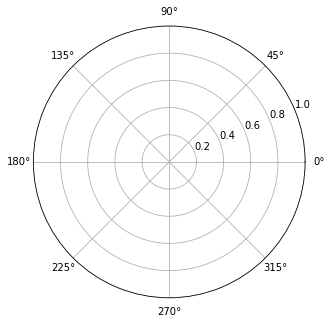

In [80]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.stats import norm
import statistics

plt.figure(figsize=(5,5))
ax = plt.subplot(111, projection = 'polar')

n, bins, _ = circular_hist(ax, point_error, offset = np.pi/2, bins = 30, density = False)
plt.title('Pointing Error ($\sigma = {:.2f}$)'.format(point_error.std()*180/np.pi))
ax.vlines([np.mean(point_error)+point_error.std(), np.mean(point_error)-point_error.std()], ymin = 0, 
          ymax = np.max(point_error.size/np.pi)*0.35, ls = "--", colors = 'k')
ax.vlines(np.mean(point_error), ymin = 0, ymax=np.max(point_error.size/np.pi)*0.35,ls = '--', colors = 'r')
plt.show()


# Recall Rates

In [18]:
cued_rec_word = full_evs.query('type == "CUED_REC_WORD"')
for i, row in cued_rec_word.iterrows():
    if row['item'] == row['cued_item']:
        full_evs.at[i, "recalled"] = 1
    else:
        full_evs.at[i, "recalled"] = 0

FFR_item = full_evs.query('type == "FFR_REC_WORD"')
FFR_item = FFR_item.drop_duplicates(subset=["item"])
FFR_item["recalled"] = FFR_item["serialpos"] > 0

KeyError: 'cued_item'

In [33]:
def add_cued_recalled(events):
    def find_recall(row):
        itemno = row['itemno']
        recalls = events[(events["type"] == 'CUED_REC_WORD') &
                         (events["session"] == row["session"]) &
                         (events["trial"] == row["trial"])]["itemno"].values
        return 1 if itemno in recalls else 0

    events = events.sort_values("mstime")
    events.loc[events["type"] =="WORD", "cued_recalled"] = events.loc[events["type"] == "WORD"].apply(find_recall, axis=1)
    return events

def add_store_recalled(events, df):
    def calculate_recall(row):
        sess_df = events[(events.subject == row.subject) & (events.session == row.session)]
        stores = sess_df.query('type == "WORD"').store.unique()
        recalls = sess_df.query('type == "FSR_REC_WORD"').item.unique()
        recall_prob = np.sum([1 for store in stores if store in recalls]) / len(stores)
        return recall_prob
    
    df["final_store_prob"] = df.apply(calculate_recall, axis=1)
    return df

In [34]:
full_evs = add_cued_recalled(full_evs)
recall_df = full_evs.query('type == "WORD"').groupby(["subject", "session"]).agg({"recalled":"mean", 
                                                                                  "cued_recalled":"mean",
                                                                                  "final_recalled":"sum", 
                                                                                  "serialpos":"count"}).reset_index()
recall_df["final_item_prob"] = recall_df["final_recalled"] / recall_df["serialpos"]
recall_df = add_store_recalled(full_evs, recall_df)

recall_plot_df = pd.DataFrame(columns=["subject", "session", "recall_type", "recall_prob"])
for i, row in recall_df.iterrows():
    recall_plot_df = recall_plot_df.append({"subject":row.subject, "session":row.session, "recall_type":"Free Recall", "recall_prob":row.recalled}, ignore_index=True)
    recall_plot_df = recall_plot_df.append({"subject":row.subject, "session":row.session, "recall_type":"Cued Recall", "recall_prob":row.cued_recalled}, ignore_index=True)
    recall_plot_df = recall_plot_df.append({"subject":row.subject, "session":row.session, "recall_type":"Final Item Recall", "recall_prob":row.final_item_prob}, ignore_index=True)
    recall_plot_df = recall_plot_df.append({"subject":row.subject, "session":row.session, "recall_type":"Final Store Recall", "recall_prob":row.final_store_prob}, ignore_index=True)


fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(data=recall_plot_df, x="recall_type", y="recall_prob", ci=None)
plt.tick_params(labelsize=16)
plt.xlabel("")
ax.yaxis.grid()
plt.ylim([0,1])
plt.ylabel("Recall Probability (%)", fontsize=18)
plt.show()

SpecificationError: nested renamer is not supported

- Above recall probabilities were calculated while ignoring any subsequent key presses

# Intrusion Analysis

In [35]:
#FREE RECALL
# Correct Rejection : intrusion != 0 and keypress == True
# False Alarm: intrusion == 0 / recalled == 1 and keypress == True
# Miss : intrusion != 0 and keypress == False
# Hit: intrusion == 0 and keypress == False

#CUED RECALL                              #intra-list intrusion
# Correct Rejection : ( intrusion != 0 | (intrusion == 0 and recalled == 0) ) and keypress == True
# False Alarm: recalled == 1 and keypress == True
# Miss : ( intrusion != 0 | (intrusion == 0 and recalled == 0) ) and keypress == False
# Hit: intrusion == 0 and recalled == 1 and keypress == False

intrusion_df = pd.DataFrame(columns=["subject", "session", "trial", "type", "intrusion_type"])

rec_evs = full_evs.query('type == "REC_WORD"')
for i, row in rec_evs.iterrows():
    if row.intrusion != 0 and row.keypress == True:
        intrusion_type = "intrusions rejected"
    elif (row.intrusion == 0 or row.recalled == 1) and row.keypress == True:
        intrusion_type = "correct recalls rejected"
    elif row.intrusion != 0 and row.keypress != True:
        intrusion_type = "intrusions accepted"
    elif row.intrusion == 0 and row.keypress != True:
        intrusion_type = "correct recalls accepted"
    else:
        intrusion_type = "None"
    
    intrusion_df = intrusion_df.append({"subject":row.subject, 
                                        "session":row.session,
                                        "trial":row.trial,
                                        "type":"Free Recall",
                                        "intrusion_type":intrusion_type
                                       }, ignore_index=True)
    
cued_rec_evs = full_evs.query('type == "CUED_REC_WORD"')
for i, row in cued_rec_evs.iterrows():
    if ( row.intrusion != 0 or (row.intrusion == 0 and row.recalled == 0) ) and row.keypress == True:
        intrusion_type = "intrusions rejected"
    elif row.recalled == 1 and row.keypress == True:
        intrusion_type = "correct recalls rejected"
    elif ( row.intrusion != 0 or (row.intrusion == 0 and row.recalled == 0) ) and row.keypress != True:
        intrusion_type = "intrusions accepted"
    elif row.intrusion == 0 and row.recalled == 1 and row.keypress != True:
        intrusion_type = "correct recalls accepted"
    else:
        intrusion_type = "None"
    
    intrusion_df = intrusion_df.append({"subject":row.subject, 
                                        "session":row.session,
                                        "trial":row.trial,
                                        "type":"Cued Recall",
                                        "intrusion_type":intrusion_type
                                       }, ignore_index=True)
    
ffr_rec_evs = full_evs.query('type == "FFR_REC_WORD"')
for i, row in ffr_rec_evs.iterrows():
    if row.intrusion < 0 and row.keypress == True:
        intrusion_type = "intrusions rejected"
    elif row.recalled == 1 and row.keypress == True:
        intrusion_type = "correct recalls rejected"
    elif row.intrusion < 0 and row.keypress != True:
        intrusion_type = "intrusions accepted"
    elif row.intrusion >= 0 and row.keypress != True:
        intrusion_type = "correct recalls accepted"
    else:
        intrusion_type = "None"
    
    intrusion_df = intrusion_df.append({"subject":row.subject, 
                                        "session":row.session,
                                        "trial":row.trial,
                                        "type":"Final Free Recall",
                                        "intrusion_type":intrusion_type
                                       }, ignore_index=True)

AttributeError: 'Series' object has no attribute 'keypress'

In [36]:
table = intrusion_df.groupby(["subject", "session", "trial", "type", "intrusion_type"]).size().reset_index(name='counts')

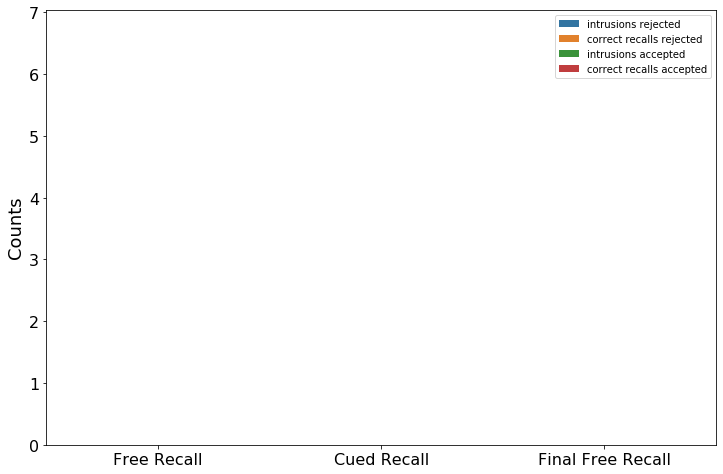

In [37]:
fig, ax = plt.subplots(figsize=(12,8))
p = sns.barplot(data=table, 
                x="type", 
                order=["Free Recall", "Cued Recall", "Final Free Recall"],
                y="counts", 
                hue="intrusion_type", 
                hue_order=["intrusions rejected", 
                           "correct recalls rejected", 
                           "intrusions accepted", 
                           "correct recalls accepted"],
#                 palette="crest",
                ci=68,
                capsize=0.05)
# plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("")
plt.ylabel("Counts", fontsize=18)
plt.gca().legend().set_title('')
# ax.yaxis.grid()
plt.show()

** Note that this is the sum over all delivery days

- Intrusions rejected: Intrusions that were correctly rejected
- Correct recalls rejected: Correct recalls that were incorrectly rejected
- Intrusions accepted: Correct recalls that were not rejected
- Correct recalls accepted: Intrusions that were not rejected

In [38]:
ci=None if len(full_evs.subject.unique()) < 5 else 68

# SPC

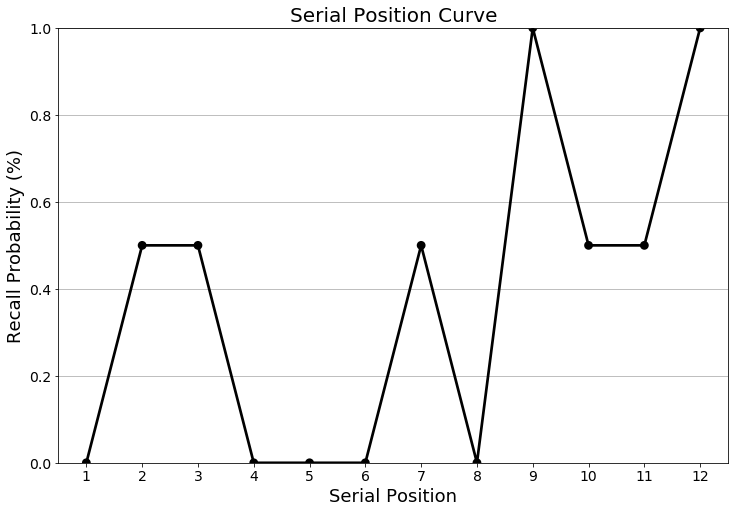

In [39]:
spc_df = full_evs.query("type=='WORD'").groupby(['subject', 'session', 'serialpos']) \
                                       .agg({'recalled':np.nanmean}).reset_index()

fig, ax = plt.subplots(figsize=(12, 8))
spc = sns.pointplot(data=spc_df, x='serialpos', y='recalled', ci=ci,
                    color='k', err_style='bars', capsize=.3, label="SPC")

plt.xlabel('Serial Position', fontsize=18)
plt.ylabel('Recall Probability (%)', fontsize=18); plt.ylim([0,1])
ax.yaxis.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title("Serial Position Curve", fontsize=20)
plt.show()

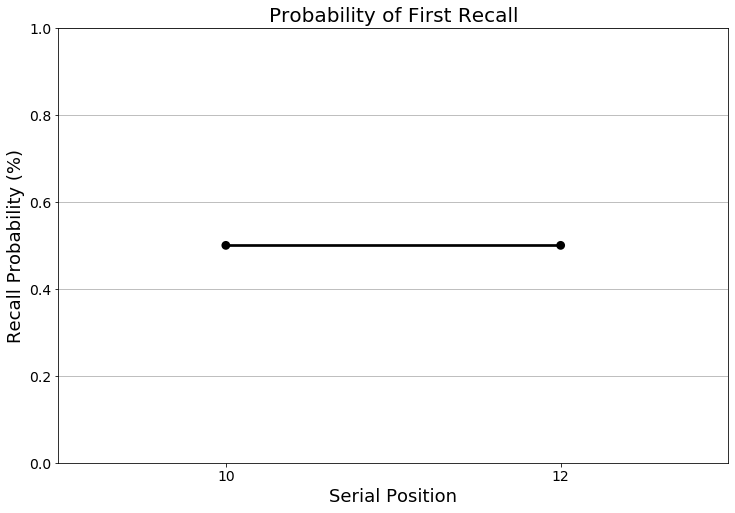

In [40]:
recword = full_evs.query('type=="REC_WORD"')
recword['pos'] = recword.groupby(['subject', 'session', 'trial']).cumcount()
first_recall_df = recword.query('pos == 0 and serialpos >= 0')
first_recall_df = first_recall_df.groupby(
    ['subject', 'session', 'serialpos']).agg(
    {'recalled': 'count'}).unstack(fill_value=0).stack().reset_index()
first_recall_df['n_lists'] = first_recall_df.groupby(['subject'])['recalled'].transform('sum')
first_recall_df['prob'] = first_recall_df['recalled'] / first_recall_df['n_lists']

fig, ax = plt.subplots(figsize=(12, 8))
pfr = sns.pointplot(data=first_recall_df, x='serialpos', y='prob', ci=ci,
                    color='k', err_style='bars', capsize=.1)
plt.xlabel('Serial Position', fontsize=18)
plt.ylabel('Recall Probability (%)', fontsize=18); plt.ylim([0,1])
ax.yaxis.grid()
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
plt.title("Probability of First Recall", fontsize=20)
plt.show()

# Lag-CRP

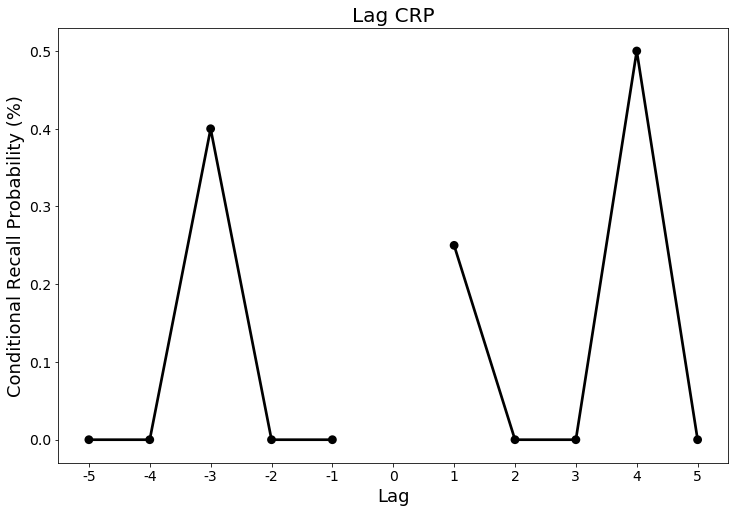

In [41]:
full_evs['itemno'] = full_evs['item'].astype('category').cat.codes
crp_df = full_evs.groupby(['subject']).apply(
    pb.pd_crp,
    itemno_column='itemno',
    list_index=['subject', 'session', 'trial'],
    lag_num=5).reset_index()

fig, ax = plt.subplots(figsize=(12,8))
crp = sns.pointplot(data=crp_df, x='lag', y='prob', ci=ci,
                    color='k', err_style='bars', capsize=.2)
plt.title("Lag CRP", fontsize=20)
plt.xlabel("Lag", fontsize=18)
plt.ylabel("Conditional Recall Probability (%)", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.grid()
# p.yaxis.grid()
plt.show()

# Spatial CRP

In [42]:
def isolate_storeX(row):
    store_location = eval(row['store position'])
    return store_location[0]

def isolate_storeZ(row):
    store_location = eval(row['store position'])
    return store_location[2]

def isolate_playerX(row):
    player_position = eval(row['player position'])
    return player_position[0]

def isolate_playerZ(row):
    player_position = eval(row['player position'])
    return player_position[2]

full_evs.loc[full_evs["type"] == "WORD", "storeX"] = full_evs.loc[full_evs["type"] == "WORD"].apply(isolate_storeX, axis=1)
full_evs.loc[full_evs["type"] == "WORD", "storeZ"] = full_evs.loc[full_evs["type"] == "WORD"].apply(isolate_storeZ, axis=1)
full_evs.loc[full_evs["type"] == "WORD", "presX"] = full_evs.loc[full_evs["type"] == "WORD"].apply(isolate_playerX, axis=1)
full_evs.loc[full_evs["type"] == "WORD", "presZ"] = full_evs.loc[full_evs["type"] == "WORD"].apply(isolate_playerZ, axis=1)

KeyError: 'store position'

In [43]:
def get_new_item_id(item, wordpool=[]):
    if item not in wordpool:
        return -999
    return wordpool.index(item)

# need to redo itemno because not using all items in wordpool
word_evs = full_evs.query('type == "WORD" and itemno > -1')
wordpool_subset = word_evs.item.unique().tolist()
full_evs['itemno'] = full_evs['item'].transform(get_new_item_id, wordpool=wordpool_subset)

In [44]:
word_evs = full_evs.query('itemno != -999 and type == "WORD"')
store_items = word_evs[['store', 'item', 'itemno']].drop_duplicates()
sub_store_locs = word_evs[['store', "storeX", "storeZ", 'subject']].drop_duplicates()
sub_store_locs['type'] = 'WORD_VALS'
loc_evs = sub_store_locs.merge(store_items)
loc_evs = loc_evs.sort_values('itemno')
test_evs = full_evs.append(loc_evs)

In [45]:
bins = [12.96160383, 41.99123618, 61.53639199, 77.73374529, 97.11224258]

spatial_crp = test_evs.groupby('subject').apply(
    pb.pd_sem_crp, list_index=['subject', 'session', 'trial'], 
    sim_columns=['storeX', 'storeZ'], bins=bins, ret_counts=False).reset_index()

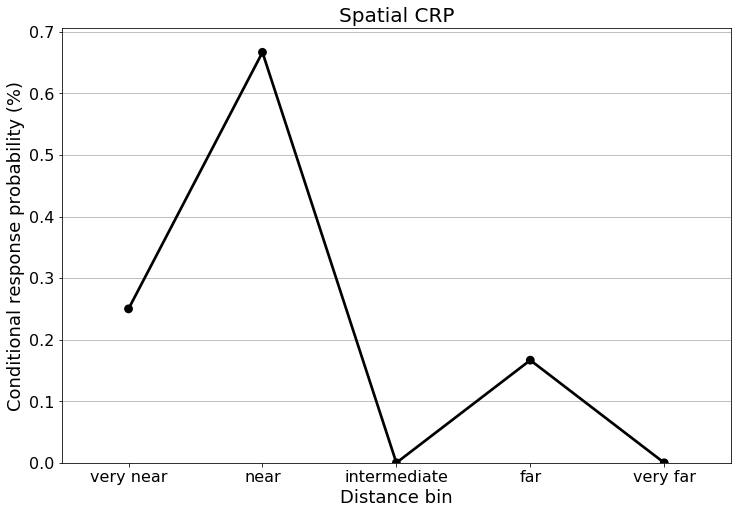

In [46]:
fig = plt.figure(figsize = (12,8))
fig.patch.set_facecolor('white')
ax1 = sns.pointplot(data=spatial_crp, x='sem_bin', y='prob', marker = 'o', color = 'black', capsize=0.1, ci=ci)
ax1.set_xlabel('Distance bin', fontsize=18)
ax1.set_xticklabels(["very near", "near", "intermediate", "far", "very far"], fontsize=14)
ax1.set_ylabel('Conditional response probability (%)', fontsize=18)
plt.yticks(fontsize=14)
ax1.yaxis.grid()
plt.tick_params(labelsize=16)
plt.ylim(0)
plt.title("Spatial CRP", fontsize=20)
plt.show()

# Navigation Trajectory

In [47]:
import random
import os
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

if len(deliv_table) > 3:
    print("Too many subjects and sessions")
else:
    for i, row in deliv_table.iterrows():

        print("{} session {}".format(row.subject, row.session))
        # pull up jsonl file from data2 directory
        file_name = "{}/session_{}/session.jsonl".format(row.subject, row.session)
        file_dir = os.path.join(data_dir, file_name)

        new_file = []
        for line in open(file_dir, "r"):
            # replace this specific entry to empty string
            if '"point condition":SerialPosition,' in line:
                line = line.replace('"point condition":SerialPosition,', '')
            elif '"point condition":SpatialPosition,' in line:
                line = line.replace('"point condition":SpatialPosition,', '')
            elif '"point condition":Random,' in line:
                line = line.replace('"point condition":Random,', '')

            data_dict = json.loads(line)
            new_file.append(data_dict)

        with open("session_tmp.jsonl", "w") as outfile:
            for line in new_file:
                json.dump(line, outfile)
                outfile.write('\n')

        log = pd.read_json("session_tmp.jsonl", lines=True)
        log = log[(log.type=='PlayerTransform')|(log.type=='object presentation begins')]

        def extract_position(row):
            if row.type=='PlayerTransform':
                return (row['data']['positionX'], row['data']['positionY'], row['data']['positionZ'])
            elif row.type=='object presentation begins':
                return eval(row['data']['player position'])
            else:
                return np.nan

        log['location']=log.apply(extract_position, axis=1)
        log['trial']=log.apply(lambda row: row['data']['trial number'] if np.isin('trial number', list(row['data'].keys())) else np.nan, axis=1)
        movements = log.fillna(method='pad').dropna()
        sess_pos = np.stack(list(map(list, movements.location.values)))

        group_mov = movements.groupby('trial')    
        dd_list = np.array(list(group_mov.groups.keys())).astype(int)
        pos_by_list = [np.stack(list(map(list, group_mov.get_group(i)['location']))) for i in dd_list]

        fig, ax = plt.subplots(len(dd_list)//2 + len(dd_list)%2, 2, 
                               figsize= (20, 8*(len(dd_list)//2 + len(dd_list)%2)) )
        ax = ax.ravel()


        for i, dd in enumerate(dd_list):
            store_locs = log['data'][(log.type=='object presentation begins')&(log.trial==i)].apply(lambda json: eval(json['store position']))
            store_names = log['data'][(log.type=='object presentation begins')&(log.trial==i)].apply(lambda json: json['store name'])
            list_stores = np.stack(list(map(list, store_locs.values)))


            points = np.array([pos_by_list[i][:, 0], pos_by_list[i][:, 2]]).T.reshape(-1, 1, 2)
            segments = np.concatenate([points[:-1], points[1:]], axis=1)

            # don't count motionless time
            segments = segments[1:][np.any(np.diff(segments, axis=0)!=0, axis=(1, 2))]
            lc = LineCollection(segments, cmap='copper_r')
            # Set the values used for colormapping
            lc.set_array(np.linspace(0, 1, len(segments)))
            lc.set_linewidth(3); lc.set_alpha(.6)
            line = ax[i].add_collection(lc)
            ax[i].scatter(list_stores[:, 0], list_stores[:, 2])
            texts = []
            for x, y, name, order in zip(list_stores[:, 0], list_stores[:, 2], store_names, np.arange(len(store_names))):
                texts.append(ax[i].text(x-10, y+5, name.capitalize() + ' ({})'.format(order)))
            ax[i].set_title('Delivery Day %d' %(dd+1), fontsize=20)
            ax[i].set_xticklabels([]);ax[i].set_yticklabels([])
        #         adjust_text(texts, expand_text=(1.2, 1.2))


            positions = []
            tmp_texts = []
            for text in texts:
        #             print(text.get_position())
                positions.append(text.get_position())
                tmp_texts.append(text)

            point1_1 = (26.700000000000003, 64.1)
            if point1_1 in positions:
                text1 = tmp_texts[positions.index(point1_1)]
                text1.set_visible(False)
                ax[i].text(26.7, 54.1, text1.get_text())

            if ((25.1, 31.7) in positions) and ((48.3, 32.9) in positions):
                text1 = tmp_texts[positions.index((25.1, 31.7))]
                text2 = tmp_texts[positions.index((48.3, 32.9))]

                text1.set_visible(False); text2.set_visible(False)

                ax[i].text(15.1, 31.7, text1.get_text())
                ax[i].text(52.3, 32.9, text2.get_text())

            point3_1 = (4.5, -28.700000000000003); point3_2 = (25.4, -28.1); point3_3 = (52.3, -28.5)
            if (point3_1 in positions) and (point3_2 in positions):

                if point3_3 in positions:
                    text1 = tmp_texts[positions.index(point3_1)]
                    text2 = tmp_texts[positions.index(point3_2)]
                    text3 = tmp_texts[positions.index(point3_3)]

                    text1.set_visible(False); text2.set_visible(False); text3.set_visible(False)

                    ax[i].text(-10, -28.700000000000003, text1.get_text())
                    ax[i].text(20.4, -28.1, text2.get_text())
                    ax[i].text(61.3, -28.5, text3.get_text())
                else:
                    text1 = tmp_texts[positions.index(point3_1)]
                    text2 = tmp_texts[positions.index(point3_2)]

                    text1.set_visible(False); text2.set_visible(False)

                    ax[i].text(-7, -28.700000000000003, text1.get_text())
                    ax[i].text(25.4, -28.1, text2.get_text())

            elif (point3_2 in positions) and (point3_3 in positions):
                text1 = tmp_texts[positions.index(point3_2)]

                text1.set_visible(False)

                ax[i].text(10.4, -28.1, text1.get_text())

            point4_1 = (-13.1, -53.5); point4_2 = (4.6, -53.8); point4_3 = (22.200000000000003, -55.9)
            if (point4_1 in positions) and (point4_2 in positions):

                if point4_3 in positions:
                    text1 = tmp_texts[positions.index(point4_1)]
                    text2 = tmp_texts[positions.index(point4_2)]
                    text3 = tmp_texts[positions.index(point4_3)]

                    text1.set_visible(False); text2.set_visible(False); text3.set_visible(False)

                    ax[i].text(-20, -65.5, text1.get_text())
                    ax[i].text(0, -53.8, text2.get_text())
                    ax[i].text(30, -55.9, text3.get_text())
                else:
                    text1 = tmp_texts[positions.index(point4_1)]
                    text2 = tmp_texts[positions.index(point4_2)]

                    text1.set_visible(False); text2.set_visible(False)

                    ax[i].text(-20, -53.5, text1.get_text())
                    ax[i].text(5, -53.8, text2.get_text())

            elif (point4_2 in positions) and (point4_3 in positions):
                text1 = tmp_texts[positions.index(point3_2)]

                text1.set_visible(False)

                ax[i].text(0, -53.8, text1.get_text())


        fig.subplots_adjust(hspace=0.2, wspace=0.2)
        plt.tight_layout()
        cbar = fig.colorbar(line, ax=ax[:], location='right', shrink = 0.7)
        cbar.ax.tick_params(labelsize=16)
        cbar.ax.set_yticklabels(["Start", "", "", "", "", "End"])
        fig.set_facecolor('white')
        for a in ax:
            a.axis("off")
        plt.show()

R1620J session -999


NameError: name 'data_dir' is not defined

# Instructions for exporting a report

In terminal, run the following commend to export the plots from this notebook to an html file.
If needed, use 'pip install nbconvert' first. 
Sometime, the version might cause an error. In that case, try running:
'pip uninstall nbconvert' and then: 
'pip install nbconvert==6.3.0' 

cd to the directory in which the notebook reside and run:

jupyter nbconvert --execute --to html EFRCourier_behavioral_analysis_clean.ipynb --no-input

This should create EFRCourier_behavioral_analysis.html file. You can rename this into something else like Noa_report.html afterwards.

# Example Dataframe

In [49]:
full_evs.query('type == "CUED_REC_WORD"').head(50)

,correctPointingDirection,eegfile,eegoffset,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,montage,msoffset,mstime,phase,presX,presZ,protocol,recalled,rectime,serialpos,session,store,storeX,storeZ,subject,submittedPointingDirection,trial,type,cued_recalled
66,-999.0,R1620J_EFRCourierReadOnly_0_03Jun22_1550,2025739,-999,EFRCourierReadOnly,-999,-999,-999,ACTION_FIGURES,5,0.0,20,1654298647435,practice,-999.0,-999.0,r1,-999,3920.0,-999,-999,-999,-999.0,-999.0,R1620J,-999.0,0,CUED_REC_WORD,NaN
70,-999.0,R1620J_EFRCourierReadOnly_0_03Jun22_1550,2032829,-999,EFRCourierReadOnly,-999,-999,-999,GARLIC,6,0.0,20,1654298654525,practice,-999.0,-999.0,r1,-999,1608.0,-999,-999,-999,-999.0,-999.0,R1620J,-999.0,0,CUED_REC_WORD,NaN
74,-999.0,R1620J_EFRCourierReadOnly_0_03Jun22_1550,2041957,-999,EFRCourierReadOnly,-999,-999,-999,SAXOPHONE,8,0.0,20,1654298663653,practice,-999.0,-999.0,r1,-999,1516.0,-999,-999,-999,-999.0,-999.0,R1620J,-999.0,0,CUED_REC_WORD,NaN
84,-999.0,R1620J_EFRCourierReadOnly_0_03Jun22_1550,2065658,-999,EFRCourierReadOnly,-999,-999,-999,AMETHYST,-999,0.0,20,1654298687354,practice,-999.0,-999.0,r1,-999,5994.0,-999,-999,-999,-999.0,-999.0,R1620J,-999.0,0,CUED_REC_WORD,NaN
87,-999.0,R1620J_EFRCourierReadOnly_0_03Jun22_1550,2071194,-999,EFRCourierReadOnly,-999,-999,-999,LUMBER,-999,0.0,20,1654298692890,practice,-999.0,-999.0,r1,-999,1728.0,-999,-999,-999,-999.0,-999.0,R1620J,-999.0,0,CUED_REC_WORD,NaN
162,-999.0,R1620J_EFRCourierReadOnly_0_03Jun22_1550,3283168,-999,EFRCourierReadOnly,-999,-999,-999,APPLES,9,0.0,20,1654299904864,,-999.0,-999.0,r1,-999,2809.0,-999,-999,-999,-999.0,-999.0,R1620J,-999.0,0,CUED_REC_WORD,NaN
165,-999.0,R1620J_EFRCourierReadOnly_0_03Jun22_1550,3291330,-999,EFRCourierReadOnly,-999,-999,-999,COMB,11,0.0,20,1654299913026,,-999.0,-999.0,r1,-999,1569.0,-999,-999,-999,-999.0,-999.0,R1620J,-999.0,0,CUED_REC_WORD,NaN
168,-999.0,R1620J_EFRCourierReadOnly_0_03Jun22_1550,3301168,-999,EFRCourierReadOnly,-999,-999,-999,GARLIC,6,0.0,20,1654299922864,,-999.0,-999.0,r1,-999,1608.0,-999,-999,-999,-999.0,-999.0,R1620J,-999.0,0,CUED_REC_WORD,NaN
187,-999.0,R1620J_EFRCourierReadOnly_0_03Jun22_1550,3341484,-999,EFRCourierReadOnly,-999,-999,-999,ACTION_FIGURES,5,0.0,20,1654299963180,,-999.0,-999.0,r1,-999,3920.0,-999,-999,-999,-999.0,-999.0,R1620J,-999.0,0,CUED_REC_WORD,NaN
190,-999.0,R1620J_EFRCourierReadOnly_0_03Jun22_1550,3348879,-999,EFRCourierReadOnly,-999,-999,-999,SAXOPHONE,8,0.0,20,1654299970575,,-999.0,-999.0,r1,-999,1516.0,-999,-999,-999,-999.0,-999.0,R1620J,-999.0,0,CUED_REC_WORD,NaN


In [50]:
# Calculate the time difference between the store presentation and the 'B' key press in the cued-recall phase:

cued_rec_df=full_evs.query('type == "CUED_REC_WORD"')
sec_diff = []
for row in range(0,len(cued_rec_df)):
    if ~np.isnan(cued_rec_df['keypress_mstime'].iloc[row]):
        ms_diff=(cued_rec_df['keypress_mstime'].iloc[row]) - (cued_rec_df['mstime'].iloc[row]) # Time difference between key press and the item presentation 
        assert ms_diff > 0
        sec_diff.append(ms_diff/1000)

median = (np.median(sec_diff))
median = float("{0:.2f}".format(median))
# Plot a histogram of the data:
fig, ax = plt.subplots(figsize=(10,6))
plt.hist(sec_diff, bins = 7, color=(0.3,0.3,0.3), range=(0, 7.5))
plt.axvline(median, color="r")
plt.title("Time between store presentation and key press, Median: {} sec".format(median), fontsize=20)
plt.xlabel("Time (sec)", fontsize=18)
plt.ylabel("Count", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# make ticks larger
plt.show()

KeyError: 'keypress_mstime'

In [29]:
# !ONLY FOR ALL SUBJECT DATA REPORT!
if len(sys.argv) == 1:  
    os.chdir("/home1/leochang/elemem_pilot/")
    !jupyter nbconvert --to html elemem_behavioral_analysis.ipynb  --no-input
    !mv elemem_behavioral_analysis.html all_subject_report.html
    !mv all_subject_report.html ./reports/all_subject_report.html

# iEEG

 Load data using CMLReader

In [1]:
import cmlreaders as cml
import matplotlib.pyplot as plt
# from ptsa.data.filters import ButterworthFilter
# from ptsa.data.filters import MorletWaveletFilter
# import xarray as xr
import warnings; warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
from eeg_check import eeg_check,plot_eeg_check_jlab,erp_sme

In [2]:
# add 'phase' column to events df (with 'encoding', 'retrieval' for FR, FFR (final FR) or FSR (final store recall))
def add_phase(evs):
    new_evs = pd.DataFrame([])
    for ind,list_evs in evs.groupby('trial'): # 'trial' is the aquivalent of a delivery day
        if list_evs['trial'].unique()!=-999:
            list_evs['phase']='nan'

            # find indexes of encoding start and end
            first_pointing_index = min(list_evs[list_evs['type']=='pointing begins'].index)
            navigation_end_index = min(list_evs[list_evs['type']=='TRIAL_END'].index)-1
            list_evs.loc[first_pointing_index:navigation_end_index]['phase']='encoding'

            # find indexes of retrieval start and end
            rec_start_index = list_evs[list_evs['type']=='REC_START'].index[0]
            rec_end_index = list_evs[list_evs['type']=='REC_STOP'].index[0]
            list_evs.loc[rec_start_index:rec_end_index]['phase']='retrieval'

            if len(list_evs[list_evs.type=='FSR_START'])>0: # relevant only for the final trial
                # find indexes of Final FR for stores start and end
                FSR_start_index = list_evs[list_evs['type']=='FSR_START'].index[0]
                FSR_end_index = list_evs[list_evs['type']=='FSR_STOP'].index[0]
                list_evs.loc[FSR_start_index:FSR_end_index]['phase']='FSR'

                 # find indexes of Final FR for items start and end
                FFR_start_index = list_evs[list_evs['type']=='FFR_START'].index[0]
                FFR_end_index = list_evs[list_evs['type']=='FFR_STOP'].index[0]
                list_evs.loc[FFR_start_index:FFR_end_index]['phase']='FFR'

        elif list_evs['trial'].unique()==-999:
            list_evs['phase']='nan'
            

        new_evs=pd.concat([new_evs,list_evs])

    return new_evs



choose subject and experiment

In [3]:
whole_df = cml.CMLReader.get_data_index() 
exp = 'EFRCourierOpenLoop'
subject = 'R1620J'# 'R1620J' # R1637T
sub_df = whole_df.query('experiment == @exp and subject == @subject')
sub_df

,Recognition,all_events,contacts,experiment,import_type,localization,math_events,montage,original_experiment,original_session,pairs,ps4_events,session,subject,subject_alias,system_version,task_events
2670,NaN,NaN,protocols/r1/subjects/R1620J/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/R1620J/localizations/0/m...,NaN,3,R1620J,R1620J,4.0,protocols/r1/subjects/R1620J/experiments/EFRCo...
2671,NaN,NaN,protocols/r1/subjects/R1620J/localizations/0/m...,EFRCourierOpenLoop,build,0,NaN,0,NaN,NaN,protocols/r1/subjects/R1620J/localizations/0/m...,NaN,4,R1620J,R1620J,4.0,protocols/r1/subjects/R1620J/experiments/EFRCo...


In [4]:
sub_df_subject = sub_df.iloc[0]['subject']
sub_df_exp = sub_df.iloc[0]['experiment']
sub_df_session = sub_df.iloc[0]['session']
reader = cml.CMLReader(subject=sub_df_subject, experiment=sub_df_exp, session=sub_df_session)
evs = reader.load('task_events')
# evs = evs.drop(columns=['stim_params']) # otherwise get unhashable dict error from xarray
evs.head(6)
evs = add_phase(evs)
evs.phase.unique()

array(['nan', 'encoding', 'retrieval', 'FSR', 'FFR'], dtype=object)

In [5]:
print(sub_df_subject+' subject, ' +sub_df_exp+ ' session '+str(sub_df_session))


R1620J subject, EFRCourierOpenLoop session 3


# Stimulation Parameter Summary

make sure only one channel was stimulated

In [6]:
DDs = evs['trial'].unique()
DDs=DDs[DDs>=0]

parameters_df2=pd.DataFrame([])
for i,delivery_day_df in evs.groupby('trial'):
    if delivery_day_df['trial'].unique()>=0:
        encoding_df=delivery_day_df[delivery_day_df['phase']=='encoding']
        encoding_stim_num = len(encoding_df[encoding_df['type']=='STIM'])
        retrieval_df=delivery_day_df[delivery_day_df['phase']=='retrieval']
        retrieval_stim_num = len(retrieval_df[retrieval_df['type']=='STIM'])
        
        stim_df=delivery_day_df[delivery_day_df['type']=='STIM']
        burst_freq=stim_df['stim_params'].iloc[0]['burst_freq']
        
        parameters_df2 = parameters_df2.append({'Burst frequency (Hz)':burst_freq,'DD':delivery_day_df['trial'].unique()[0],
                                               'Number of encoding stim':encoding_stim_num,'Number of retrieval stim (EFR)':retrieval_stim_num
                                               },ignore_index=True)
#         parameters_df2 = parameters_df2.append({'Burst frequency (Hz)':burst_freq,'DD':delivery_day_df['trial'].unique()[0],
#                                                'Number of encoding stim':encoding_stim_num,'Number of retrieval stim (EFR)':retrieval_stim_num,
#                                                'Number of FSR stim':FSR_stim_num,'Number of FFR stim':FFR_stim_num},ignore_index=True)
parameters_df2 

# add final free recall of stores:
FSR_array = np.zeros(len(evs.trial.unique()[evs.trial.unique()>=0]))*np.nan
FSR_df=evs[evs['phase']=='FSR']
FSR_stim_num = len(FSR_df[FSR_df['type']=='STIM'])
FSR_array[FSR_df.trial.unique()[0]]=FSR_stim_num

# add final free recall of stores:
FFR_array = np.zeros(len(evs.trial.unique()[evs.trial.unique()>=0]))*np.nan
FFR_df=evs[evs['phase']=='FFR']
FFR_stim_num = len(FFR_df[FFR_df['type']=='STIM'])
FFR_array[FFR_df.trial.unique()[0]]=FFR_stim_num



parameters_df2['Number of FSR stim']=FSR_array
parameters_df2['Number of FFR stim']=FFR_array

parameters_df2

,Burst frequency (Hz),DD,Number of encoding stim,Number of retrieval stim (EFR),Number of FSR stim,Number of FFR stim
0,3.0,0.0,5.0,15.0,NaN,NaN
1,3.0,1.0,6.0,15.0,NaN,NaN
2,3.0,2.0,5.0,15.0,NaN,NaN
3,3.0,3.0,6.0,15.0,NaN,NaN
4,3.0,4.0,5.0,15.0,15.0,30.0


Burst frequency should be alternating between 3 and 8 Hz.

Number of encoding stim should be equal to 0.5 of encoded items (6).

Number of retrieval stim events should be equal to:
the length of the retrieval period (90 sec for EFR and FSR, 180 sec for FFR) / duration of each stim event (3 sec)*2

In [7]:
evs=add_phase(evs)

stim_index=evs[evs['type']=='STIM'].index
labels=pd.DataFrame([])
# burst_freq = []
for ind in stim_index:
    stim_params=evs['stim_params'].loc[ind]
    anode_label=stim_params['anode_label']
    cathode_label=stim_params['cathode_label']
    label1 = [anode_label+'-'+cathode_label]
    label2 = [cathode_label+'-'+anode_label]
    labels = labels.append(label1)
    labels = labels.append(label2)
#     burst_freq.append(stim_params['burst_freq'])

labels[0].unique()
labels=labels[0].unique()
print(labels)
print(evs['phase'].unique())

['RMTP6-RMTP5' 'RMTP5-RMTP6']
['nan' 'encoding' 'retrieval' 'FSR' 'FFR']


In [8]:
amplitude=evs['stim_params'].loc[stim_index[0]]['amplitude']
stim_duration=evs['stim_params'].loc[stim_index[0]]['stim_duration']
pulse_freq=evs['stim_params'].loc[stim_index[0]]['pulse_freq']

In [9]:
evs=evs.drop(columns=['stim_params'])# otherwise ptsa won't work
reader = cml.CMLReader(subject=sub_df_subject, experiment=sub_df_exp, session=sub_df_session,montage=sub_df.iloc[0]['montage'],localization=sub_df.iloc[0]['localization'])
word_evs = evs[evs.type=='WORD']
# evs=evs.drop['stim_params']
pairs = reader.load('pairs')
pairs
buf = 2000
eeg= reader.load_eeg(word_evs, rel_start=-500 - buf, rel_stop=500 + buf, scheme=pairs)#.to_ptsa()
eeg_ptsa = eeg.to_ptsa()


convert label to location:

In [10]:
# evs.type.isin(wanted)
stim_pair = pairs[pairs['label'].isin(labels)]
if  np.any(stim_pair.columns.isin(['stein.region'])) and stim_pair['stein.region'].iloc[0]!= None:
    stim_region=stim_pair['stein.region']
elif  np.any(stim_pair.columns.isin(['mni.region'])) and stim_pair['mni.region'].iloc[0]!= None:
    stim_region=stim_pair['mni.region']
elif  np.any(stim_pair.columns.isin(['ind.region'])) and stim_pair['ind.region'].iloc[0]!= None:
    stim_region=stim_pair['ind.region']

stim_region

53     Right MTG middle temporal gyrus
Name: mni.region, dtype: object

In [11]:
# parameters_df=pd.DataFrame({'anode':anode_label,'cathode':cathode_label},ignore_index=True)
data={'Anode':[anode_label],'Cathode':[cathode_label],'Region':[stim_region.iloc[0]],'Atlas':[stim_region.name],
     'Amplitude [mA]':amplitude,'Duration [ms]':stim_duration,'Pulse Frequency [Hz]':pulse_freq}
parameters_df=pd.DataFrame(data)
parameters_df
# evs['stim_params'

,Anode,Cathode,Region,Atlas,Amplitude [mA],Duration [ms],Pulse Frequency [Hz]
0,RMTP6,RMTP5,Right MTG middle temporal gyrus,mni.region,0.5,3000,200


# Plot EEG

seperate encoded words to stim and no-stim

In [12]:
encoding_evs = evs[evs['phase']=='encoding']
encoding_evs


,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,...,rectime,serialpos,session,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
3,117710,-999.000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,pharmacy,-999.000000,-999.000,R1620J,-999.00000,0,pointing begins
4,151332,178.375,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,-999,-999.000000,-999.000,R1620J,61.90625,0,pointing finished
5,170606,-999.000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,-999,-999.000000,-999.000,R1620J,-999.00000,0,STIM
6,171803,-999.000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,0,0,-999,ASPIRIN,-999,...,-999,1,3,pharmacy,-3.070312,-58.500,R1620J,-999.00000,0,WORD
7,173604,-999.000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,dentist,-3.070312,-58.500,R1620J,-999.00000,0,pointing begins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,2982165,-999.000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,pizzeria,62.343750,-33.500,R1620J,-999.00000,4,pointing begins
542,2987165,286.750,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,-999,62.343750,-33.500,R1620J,275.25000,4,pointing finished
543,2995976,-999.000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,0,0,-999,OLIVES,-999,...,-999,12,3,pizzeria,35.406250,-33.125,R1620J,-999.00000,4,WORD
544,2997976,-999.000,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,craft shop,35.406250,-33.125,R1620J,-999.00000,4,pointing begins


In [13]:
# Stim during encoding:
Estim=pd.DataFrame([]);
Enostim=pd.DataFrame([])


encoding_evs = evs[evs['phase']=='encoding']
stim_words=[]; nonstim_words=[]
for indx in range(len(encoding_evs)):
    if indx > 0:
        if encoding_evs.iloc[indx]['type']=='WORD' and encoding_evs.iloc[indx-1]['type']=='STIM':
            stim_words.append(encoding_evs.iloc[indx]['item'])
        elif encoding_evs.iloc[indx]['type']=='WORD' and encoding_evs.iloc[indx-1]['type']=='pointing finished':
            nonstim_words.append(encoding_evs.iloc[indx]['item'])
    elif indx == 0: # account for first item in list
            if encoding_evs.iloc[indx]['type']=='WORD':
                nonstim_words.append(encoding_evs.iloc[indx]['item'])

#     assert(len(stim_words)  + len(nonstim_words))==27 ,f'Error in words number: subject {ret_stim_subject} session {ret_stim_session} list {ret_stim_list}'      
Estim=Estim.append(encoding_evs[encoding_evs['item'].isin(stim_words)])
Enostim=Enostim.append(encoding_evs[encoding_evs['item'].isin(nonstim_words)])
print(len(Estim))
print(len(Enostim))



27
33


Text(0.5, 0, 'Time from word onset(ms)')

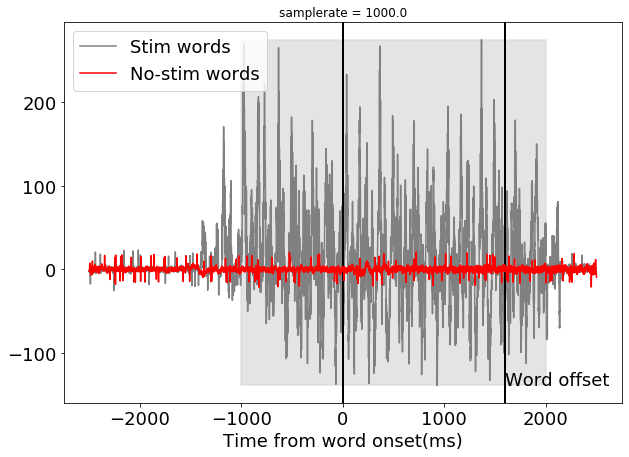

In [14]:

filter_line_noise = True # filter 60 and 120 hz

# word_evs = evs[evs.type=='WORD']
events=[Estim,Enostim]
events_title=['Stim Words','No-Stim Words']


buf = 2000
eeg_ptsa = reader.load_eeg(Estim, rel_start=-500 - buf, rel_stop=500 + buf, scheme=pairs).to_ptsa()

# Butterworth filter to remove 60 Hz line noise + harmonic at 120
if filter_line_noise == True:
    eeg_ptsa = eeg_ptsa.filtered([58, 62])
    eeg_ptsa = eeg_ptsa.filtered([118, 122])

plt.figure(figsize=(10, 7))
eeg_raw = eeg_ptsa.mean(dim=['event','channel'])#.plot()
e=eeg_raw.plot(label = "Stim words",color='grey')

#3 plot charachteristics
plt.xlabel('Time from word onset(ms)', fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.axvline(x=0,color='black',linewidth=2)
plt.axvline(x=1600,color='black',linewidth=2)
# add rectangle
hight=abs(int(min(eeg_raw)))+int(max(eeg_raw))
rect = plt.Rectangle((-1000,int(min(eeg_raw))),3000,hight,linewidth=1.5,fill=True,alpha=0.6,facecolor='lightgrey', edgecolor='lightgrey',linestyle='-')
plt.text(1600, int(min(eeg_raw)), 'Word offset', fontsize = 18)
# Add the patch to the Axes
plt.gca().add_patch(rect)


# Plot no-stim data
eeg_ptsa = reader.load_eeg(Enostim, rel_start=-500 - buf, rel_stop=500 + buf, scheme=pairs).to_ptsa()

# Butterworth filter to remove 60 Hz line noise + harmonic at 120
if filter_line_noise == True:
    eeg_ptsa = eeg_ptsa.filtered([58, 62])
    eeg_ptsa = eeg_ptsa.filtered([118, 122])

eeg_raw = eeg_ptsa.mean(dim=['event','channel'])#.plot()
e=eeg_raw.plot(label = "No-stim words",color='red')
plt.legend(loc="upper left",fontsize=18)
plt.xlabel('Time from word onset(ms)', fontsize=18)


Raw iEEG data, averaged across all channels, for either stimulated words (grey) or not-stimulated words (red).

Grey background mark stimulation time window (1 sec prior to words presentation and up to 400 ms follwing the end of word presentation)

Vertical black lines mark word onset and offset.

# Plot stimulation during retrieval


In [15]:
def retrieval_plot (evs,title):
    '''
    evs is a dataframe
    title is the title to be shown in the graph (should be string)
    '''
    filter_line_noise = True # filter 60 and 120 hz

    buf = 3000
    eeg_ptsa = reader.load_eeg(evs, rel_start=-1000 - buf, rel_stop=1000 + buf, scheme=pairs).to_ptsa()

    # Butterworth filter to remove 60 Hz line noise + harmonic at 120
    if filter_line_noise == True:
        eeg_ptsa = eeg_ptsa.filtered([58, 62])
        eeg_ptsa = eeg_ptsa.filtered([118, 122])

    plt.figure(figsize=(10, 7))
    eeg_raw = eeg_ptsa.mean(dim=['event','channel'])#.plot()
    e=eeg_raw.plot(color='grey')

    # plot charachteristics
    plt.xlabel('Time from stimulation onset (ms)', fontsize=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.title(title,fontsize=18)
    # # add rectangle
    hight=abs(int(min(eeg_raw)))+int(max(eeg_raw))
    rect = plt.Rectangle((0,int(min(eeg_raw))),3000,hight,linewidth=1.5,fill=True,alpha=0.6,facecolor='lightgrey', edgecolor='lightgrey',linestyle='-')
    plt.text(3000, int(min(eeg_raw)), 'stimulation offset', fontsize = 18)
    # Add the patch to the Axes
    plt.gca().add_patch(rect)


## Externalized free-recall phase

In [35]:
retrieval_evs = evs[evs['phase']=='retrieval']
stim_retrieval_evs = retrieval_evs[retrieval_evs['type']=='STIM']
stim_retrieval_evs.head(3)

,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,...,rectime,serialpos,session,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
49,529907,-999.0,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,-999,-999.0,-999.0,R1620J,-999.0,0,STIM
55,535906,-999.0,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,-999,-999.0,-999.0,R1620J,-999.0,0,STIM
59,541907,-999.0,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,-999,-999.0,-999.0,R1620J,-999.0,0,STIM


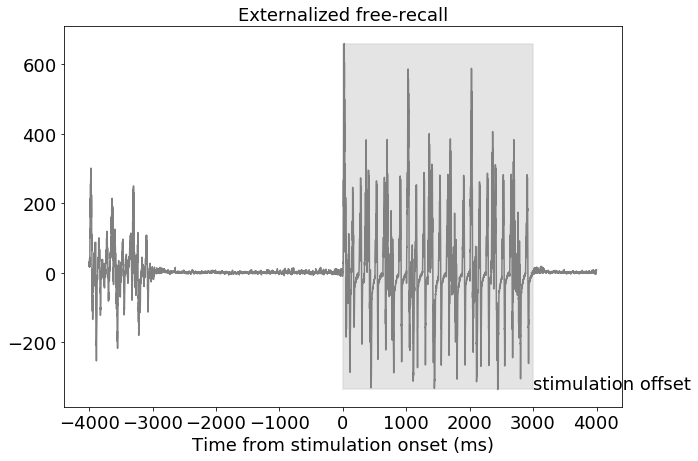

In [34]:
retrieval_plot(stim_retrieval_evs,'Externalized free-recall')

Raw iEEG data, averaged across all channels, for the externalized free-recall retrieval period.

Grey background mark stimulation time window (total duration of 3 sec)


## Final free-recall of items


In [36]:
FFR_evs = evs[evs['phase']=='FFR']
stim_FFR_evs = FFR_evs[FFR_evs['type']=='STIM']
stim_FFR_evs.head(3)

,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,...,rectime,serialpos,session,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
669,3407561,-999.0,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,-999,-999.0,-999.0,R1620J,-999.0,4,STIM
674,3413561,-999.0,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,-999,-999.0,-999.0,R1620J,-999.0,4,STIM
677,3419566,-999.0,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,-999,-999.0,-999.0,R1620J,-999.0,4,STIM


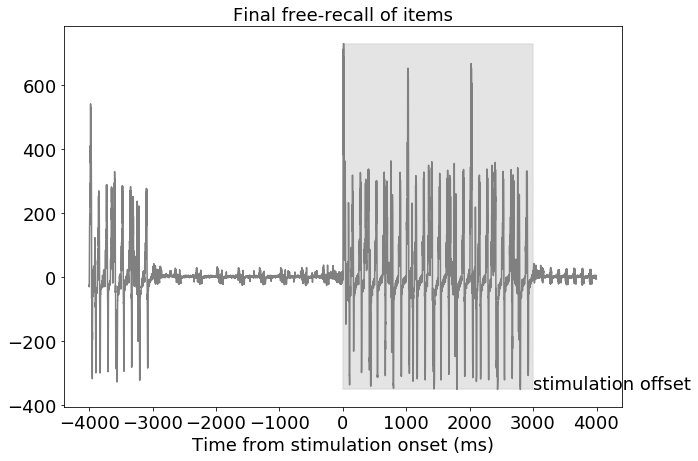

In [36]:
retrieval_plot(FFR_evs,'Final free-recall of items')

## Final free-recall of stores


In [37]:
FSR_evs = evs[evs['phase']=='FSR']
stim_FSR_evs = FSR_evs[FSR_evs['type']=='STIM']
stim_FSR_evs.head(3)

,eegoffset,correctPointingDirection,eegfile,efr_mark,experiment,finalrecalled,intruded,intrusion,item,itemno,...,rectime,serialpos,session,store,storeX,storeZ,subject,submittedPointingDirection,trial,type
627,3302160,-999.0,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,-999,-999.0,-999.0,R1620J,-999.0,4,STIM
633,3308160,-999.0,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,-999,-999.0,-999.0,R1620J,-999.0,4,STIM
638,3314193,-999.0,R1620J_EFRCourierOpenLoop_3_07Jun22_1320,-999,EFRCourierOpenLoop,-999,-999,-999,-999,-999,...,-999,-999,3,-999,-999.0,-999.0,R1620J,-999.0,4,STIM


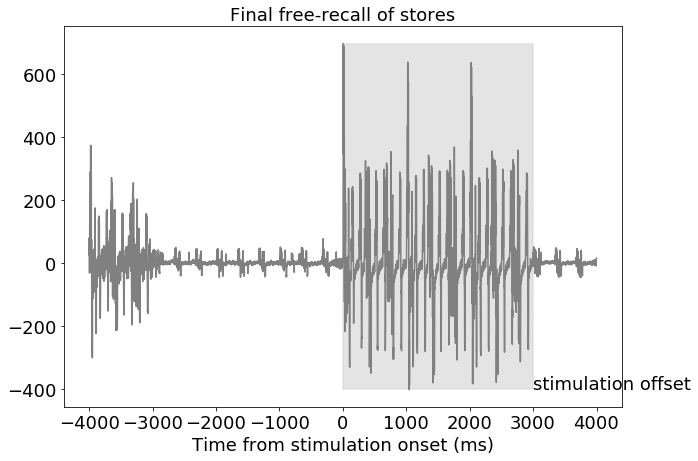

In [38]:
retrieval_plot(FSR_evs,'Final free-recall of stores')

# Plot example event for each channel

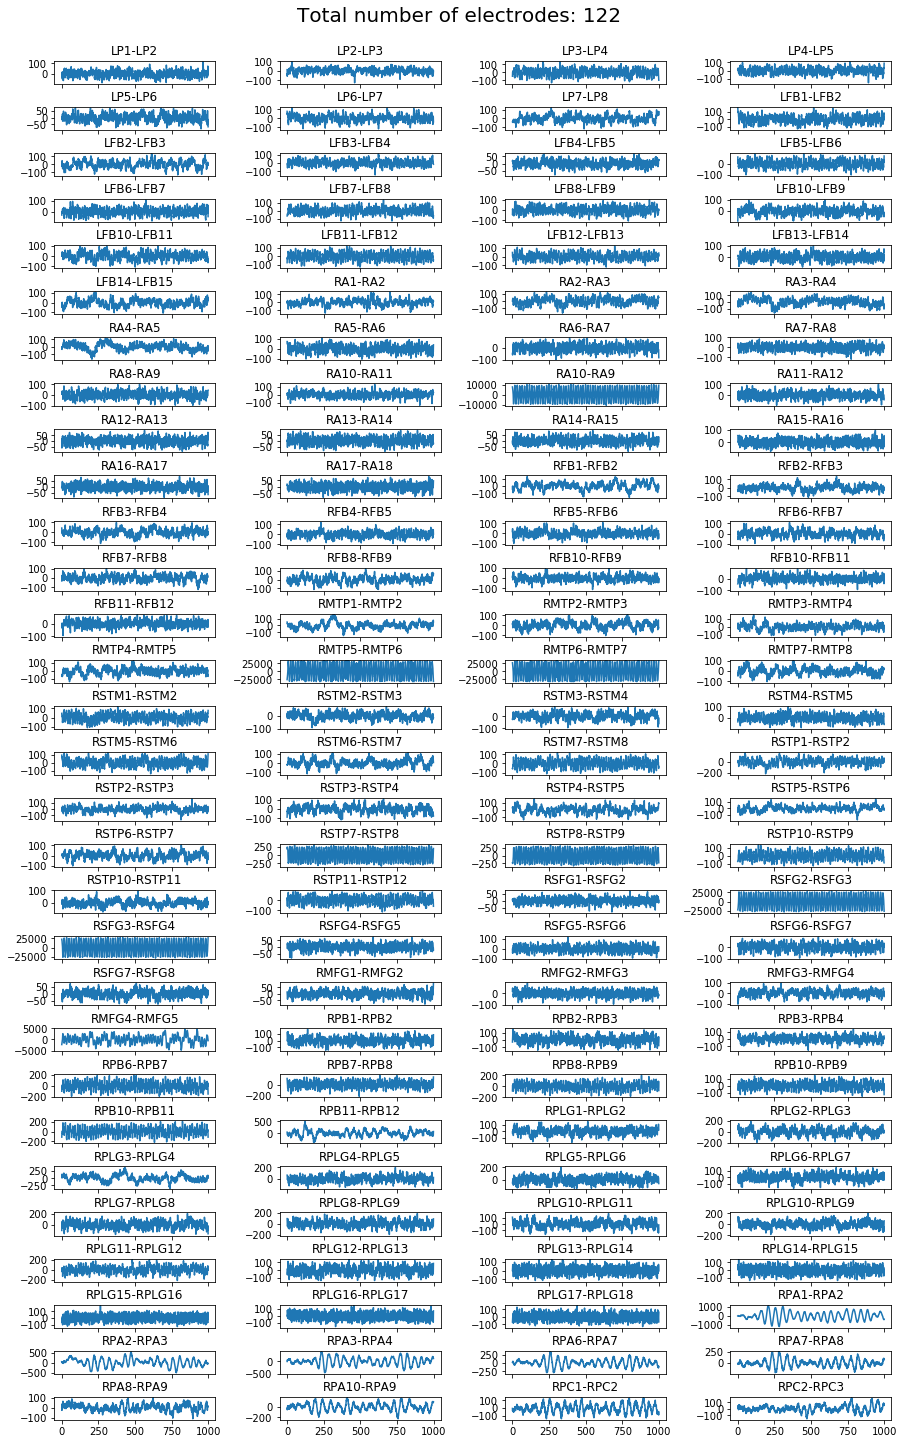

In [34]:
filter_line_noise = False # filter 60 and 120 hz
event_number_to_plot = 5  # which event to plot data? Maybe don't select 0 since first one could be weird

no_stim_evs = evs[evs.type=='pointing finished']
# rec_evs = evs[evs.type=='REC_WORD']
pairs = reader.load('pairs')

#     pairs = reader.load('pairs')
buf = 500
eeg = reader.load_eeg(no_stim_evs, rel_start= -buf , rel_stop = 1000 + buf, scheme=pairs)
eeg_ptsa = eeg.to_ptsa()[event_number_to_plot]

# Butterworth filter to remove 60 Hz line noise + harmonic at 120
if filter_line_noise == True:
    eeg_ptsa = eeg_ptsa.filtered([58, 62])
    eeg_ptsa = eeg_ptsa.filtered([118, 122])

fig, ax = plt.subplots(len(pairs)//4, 4, figsize=(15, 25), sharex=True, sharey=False)
ax = np.ravel(ax)
for i in range(len(pairs) - len(pairs)%4):
    ax[i].plot(eeg_ptsa[i, :1000])
    ax[i].set_title(pairs['label'].iloc[i])
    if i ==len(pairs) - len(pairs)%4:
        ax[i].set_xlabel('Time (ms)')
    
plt.subplots_adjust(wspace=.4, hspace=1)
# plt.suptitle(sub_df_subject+', session '+str(sub_df_session), fontsize=20,y=0.91)
_=plt.suptitle('Total number of electrodes: '+ str(len(pairs)), fontsize=20,y=0.91)

# plt.plot()

# print('Number of electrodes: ', len(pairs))

Raw iEEG data (1 Sec) in each collected contact for one example trial.

# SME

CPP total time wavelet loop:  3.4669458866119385


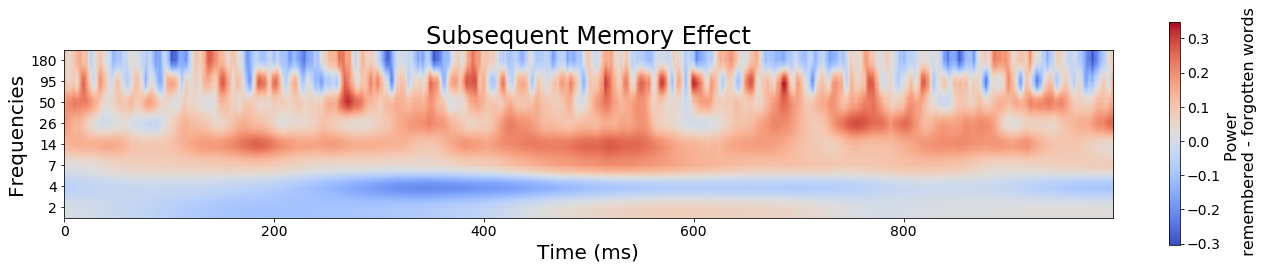

In [65]:
from ptsa.data.filters import MorletWaveletFilter

word_evs = evs[evs.type=='WORD']
# contacts = reader.load('contacts')

buf = 500
eeg = reader.load_eeg(word_evs, rel_start=-500 - buf, rel_stop=500 + buf, scheme=contacts)
sr = round(eeg.samplerate)
eeg_ptsa = eeg.to_ptsa()

# Butterworth filter to remove 60 Hz line noise + harmonic at 120
eeg_ptsa = eeg_ptsa.filtered([58, 62])
eeg_ptsa = eeg_ptsa.filtered([118, 122])

#Get spectral power
myfreqs = np.logspace(np.log10(2), np.log10(180), 8)  #4-100 Hz, 40 frequencies
wf = MorletWaveletFilter(timeseries=eeg_ptsa, freqs=myfreqs, width=4, output='power') 
pow_wavelet = wf.filter()   #output is freqs, events, elecs, and time
buff_in_samples=int((buf/1000.)*sr) # convert buffer time to samples
pows = pow_wavelet.isel(time=np.arange(buff_in_samples,len(pow_wavelet.time)-buff_in_samples))  #remove buffer period    
pows = np.log10(pows) # get log of powers. # powes time is 2750 samples, corresponding to 2750/500=5,500ms. # in some versions use:np.log10(pows.data) instead.

mask = word_evs.recalled.astype(bool).values
sme = pows[:, mask].mean(['event', 'channel']) - pows[:, ~mask].mean(['event', 'channel'])

# PLOT
fig = plt.figure(figsize=(20, 10))
ax = plt.gca()
im = ax.imshow(sme, cmap='coolwarm', aspect = 20, interpolation='hamming')
plt.yticks(ticks = range(0, 8), labels=[f"{f:.0f}" for f in np.logspace(np.log10(2), np.log10(180), 8)])
labels = ax.get_xticklabels()
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.xlabel('Time (ms)', fontsize=20)
plt.ylabel('Frequencies', fontsize=20)
plt.title('Subsequent Memory Effect', fontsize=24)
cbar = plt.colorbar(im, ax=ax, fraction = .01)
cbar.set_label(label='Power \n remembered - forgotten words', size=16)
cbar.ax.tick_params(labelsize=14)
plt.gca().invert_yaxis()
plt.show()